## 数据准备

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
red=pd.read_csv(r'/Users/apple/Desktop/商业数据分析项目/week 6/reddata.csv')

In [3]:
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,43.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,34.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,16.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      17723 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


- gender，age，engaged_last_30有缺失值

In [5]:
#缺失值占比
red.isnull().sum()/len(red)

revenue                    0.000000
gender                     0.398241
age                        0.398241
engaged_last_30            0.398241
lifecycle                  0.000000
 days_since_last_order     0.000000
previous_order_amount      0.000000
3rd_party_stores           0.000000
dtype: float64

In [6]:
#查看age非缺失值的描述性统计
red.loc[~red['age'].isna(),'age'].describe()

#age缺失值采取均值填充
red.age=red.age.fillna(red.age.mean())
red.age.describe()

count    29452.000000
mean        29.419286
std          7.147199
min         14.000000
25%         27.000000
50%         29.419286
75%         32.000000
max         45.000000
Name: age, dtype: float64

In [7]:
red.gender.unique()

array([ 0., nan,  1.])

In [8]:
#gender缺失值填充
red=red.fillna('unknown')

In [9]:
#类别变量变哑变量
red_dummies=pd.get_dummies(red)

In [10]:
red_dummies.head()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,43.000000,4.26,2343.870,0,1,0,0,1,0,0,0,1,0
1,200.99,34.000000,0.94,8539.872,0,1,0,0,1,0,0,1,0,0
2,69.98,16.000000,4.29,1687.646,1,1,0,0,1,0,0,0,0,1
3,649.99,29.419286,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,29.419286,21.13,3968.490,4,0,0,1,0,0,1,0,0,1


## EDA

### 单变量分析

#### revenue

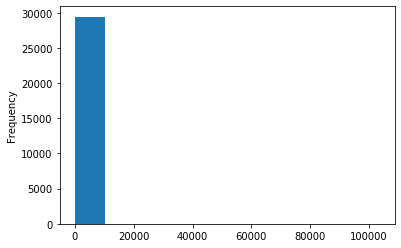

In [11]:
red.revenue.plot(kind='hist');

- 消费额差异较大,之后考虑做离群值处理

#### gender

In [12]:
red.gender.unique()

array([0.0, 'unknown', 1.0], dtype=object)

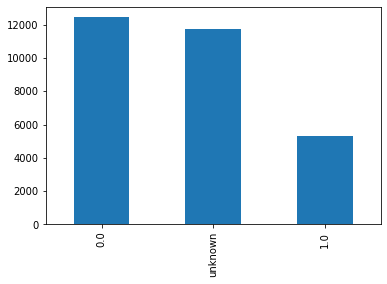

In [13]:
red['gender'].value_counts(dropna=False).plot(kind='bar');

- gender无序分类变量，之后做get_dummies处理。

#### age

In [14]:
red.age.describe()

count    29452.000000
mean        29.419286
std          7.147199
min         14.000000
25%         27.000000
50%         29.419286
75%         32.000000
max         45.000000
Name: age, dtype: float64

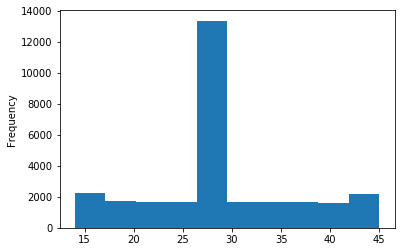

In [15]:
red['age'].plot(kind='hist',bins=10);

- 均值填充影响的数据

#### 用户行为特征

In [16]:
red.lifecycle.unique()

array(['B', 'A', 'C'], dtype=object)

In [17]:
red.engaged_last_30.unique()

array([0.0, 'unknown', 1.0], dtype=object)

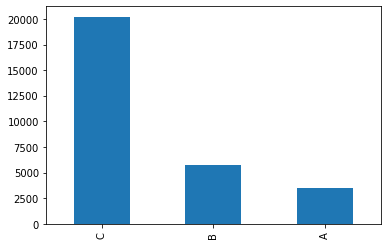

In [18]:
red.lifecycle.value_counts().plot(kind='bar');

- A B C定序分类，C远多于B和A

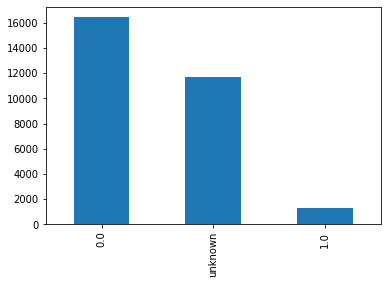

In [19]:
red.engaged_last_30.value_counts(dropna=False).plot(kind='bar');

In [20]:
red.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

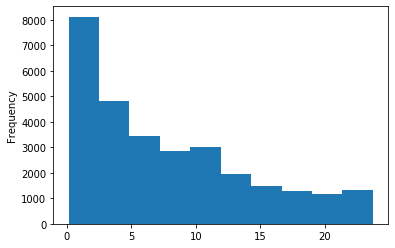

In [21]:
red[' days_since_last_order '].plot(kind='hist');

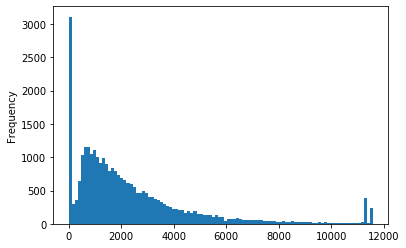

In [22]:
red['previous_order_amount'].plot(kind='hist',bins=100);

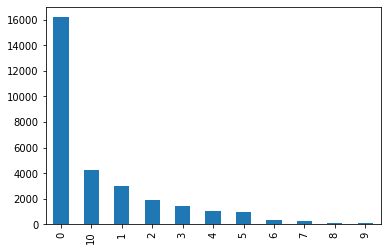

In [23]:
red['3rd_party_stores'].value_counts().plot(kind='bar');

### 多变量分析

In [24]:
#数值型变量
red.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,29.419286,7.711348,2339.254020,2.286059
std,959.755615,7.147199,6.489289,2361.572921,3.538219
min,0.020000,14.000000,0.130000,0.000000,0.000000
25%,74.970000,27.000000,2.190000,773.349500,0.000000
50%,175.980000,29.419286,5.970000,1655.790000,0.000000
75%,498.772500,32.000000,11.740000,3084.796500,3.000000
max,103466.100000,45.000000,23.710000,11597.900000,10.000000


- revenue&previous_order_amount极差偏大，可能有离群值；
- days_since_last_order范围max23.7，mean7，基本一个月内有下单，复购率高。
- 3rd_party_stores第三方购买数量较少，大部分用户购买自营产品。

In [25]:
#类别型变量gender与目标列revenue
red.groupby('gender').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0.0,12438.0,376.087884,664.092156,0.02,71.98,165.97,470.975,29080.8
1.0,5285.0,397.331844,616.564433,0.83,75.96,180.98,499.990,16500.0
unknown,11729.0,419.206270,1293.523770,0.02,75.96,179.00,528.990,103466.1


- 数量上女性用户>男性用户，平均销售额女性用户<男性用户。
- 大比例的unknown平均销售额高于男性和女性，实际业务中可以查看unknown中是否有更大比例的女性。

In [26]:
#类别型变量engaged_last_30与目标列revenue
red.groupby('engaged_last_30').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
engaged_last_30,,,,,,,,
0.0,16428.0,367.810252,578.019107,0.02,71.18,160.37,458.9725,22214.92
1.0,1295.0,567.793893,1230.402270,1.00,109.99,299.94,674.0800,29080.80
unknown,11729.0,419.206270,1293.523770,0.02,75.96,179.00,528.9900,103466.10


- 最近30天在app上参加重要活动的顾客量很少，但平均销售额高，同时存在大比例未知。
- 业务建议：提高用户参与重要活动积极性，有助于提升销售业绩。

In [27]:
#类别型变量lifecycle与目标列revenue
red.groupby('lifecycle').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
lifecycle,,,,,,,,
A,3542.0,432.603267,1902.556578,0.02,71.93,170.945,479.835,103466.10
B,5709.0,379.718743,602.175686,0.10,72.99,179.980,469.190,21068.17
C,20201.0,395.745516,778.255044,0.02,74.99,174.980,505.980,62100.00


- 注册6个月之内的顾客，平均销售额高，但大部分顾客是注册两年之内的。
- 业务建议：给予老用户福利，刺激其消费；吸引新用户注册，提高新用户数量。

## 相关与可视化

In [28]:
red_dummies.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.168186
engaged_last_30_1.0,0.038149
days_since_last_order,0.036754
gender_unknown,0.018762
engaged_last_30_unknown,0.018762
lifecycle_A,0.013688
age,0.003292
gender_1.0,0.000127
lifecycle_C,-0.002042


- 除了previous_order_amount其他值相关性很小。

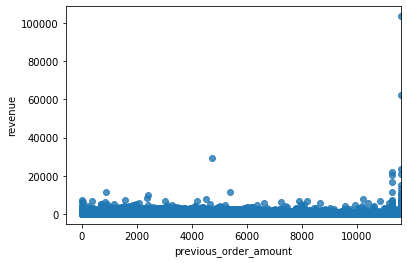

In [29]:
#可视化previous_order_amount与revenue回归关系
sns.regplot('previous_order_amount','revenue',red)

## 建立回归模型

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=red['revenue']
x=red[['previous_order_amount']]
model.fit(x,y)

LinearRegression()

In [31]:
#自变量系数
model.coef_

array([0.06835166])

In [32]:
#模型截距
model.intercept_

237.17962270921936

In [33]:
#模型打分
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y
#计算rmse mae
rmse=(error**2).mean()**0.5
mae=abs(error).mean()
print(rmse)
print(mae)

946.0681075269005
356.3868842528138


In [34]:
#标准模型输出图
from statsmodels.formula.api import ols
model_ols=ols('y~x',red).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     857.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          8.74e-186
Time:                        15:32:46   Log-Likelihood:            -2.4360e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29450   BIC:                         4.872e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    237.1796      7.760     30.565      0.0

- 得到模型 revenue=237.1796+0.0684*previous_order_amount
- 模型解读：以往积累的购买金额每增加1000个单位，小红书销售额增加68.4个单位。
- R方过低（0.028）需要进行模型优化。

## 模型优化

### 检查缺失值，改善缺失值处理

In [35]:
red.loc[red.gender=='unknown','engaged_last_30'].unique()

array(['unknown'], dtype=object)

In [36]:
red.loc[red.gender=='unknown','age'].unique()

array([29.41928567])

- 3个有缺失值的变量一致，有理由怀疑是系统性误差，尝试去除该部分数据后建模。

In [37]:
red_keep=red[red.gender!='unknown']
red_keep.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,17723.000000,17723.000000,17723.000000,17723.000000,17723.000000
mean,382.422835,29.419286,7.213524,2529.957366,1.974384
std,650.338310,9.213604,6.208626,2485.866191,3.266018
min,0.020000,14.000000,0.130000,0.000000,0.000000
25%,72.980000,21.000000,2.030000,852.975000,0.000000
50%,169.990000,29.000000,5.450000,1805.309000,0.000000
75%,479.990000,37.000000,11.160000,3336.754500,3.000000
max,29080.800000,45.000000,23.710000,11597.900000,10.000000


- revenue，previous_order_amount极差还是很大。

In [38]:
red_keep_dummies=pd.get_dummies(red_keep)
red_keep_dummies.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.214504
engaged_last_30_1.0,0.080031
days_since_last_order,0.059706
gender_1.0,0.014944
lifecycle_A,0.010984
lifecycle_C,0.006577
age,0.006263
gender_0.0,-0.014944
lifecycle_B,-0.016523


### revenue 处理

In [39]:
#revenue离群值处理
IQR=red_keep_dummies.revenue.describe()['75%']-red_keep_dummies.revenue.describe()['25%']
new_max=red_keep_dummies.revenue.describe()['75%']+1.5*IQR
new_max

1090.505

In [40]:
#revenue筛选极值
red_keep_dummies2=red_keep_dummies[red_keep_dummies.revenue<1091]
red_keep_dummies2.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,engaged_last_30_0.0,engaged_last_30_1.0,lifecycle_A,lifecycle_B,lifecycle_C
count,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000,16349.000000
mean,258.625584,29.402960,7.113692,2412.073883,2.000122,0.703713,0.296287,0.930516,0.069484,0.125879,0.214142,0.659979
std,257.249466,9.193697,6.136313,2364.090462,3.273108,0.456633,0.456633,0.254284,0.254284,0.331723,0.410238,0.473730
min,0.020000,14.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.990000,21.000000,2.000000,826.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140.000000,29.000000,5.350000,1740.970000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,371.980000,37.000000,10.970000,3195.460000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1090.890000,45.000000,23.710000,11597.900000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
red_keep_dummies2.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.156669
days_since_last_order,0.106411
engaged_last_30_1.0,0.071823
lifecycle_C,0.020118
gender_1.0,0.012769
age,0.002088
lifecycle_B,-0.011088
gender_0.0,-0.012769
lifecycle_A,-0.015018


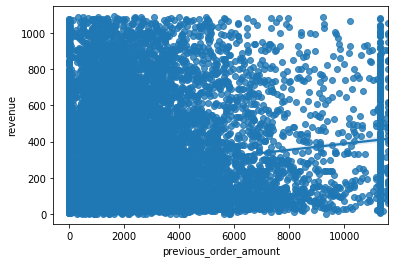

In [42]:
sns.regplot('previous_order_amount','revenue',red_keep_dummies2);

In [43]:
y=red_keep_dummies2['revenue']
x=red_keep_dummies2[['previous_order_amount']]
model_ols=ols('y~x',red_keep_dummies2).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     411.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.42e-90
Time:                        15:32:48   Log-Likelihood:            -1.1373e+05
No. Observations:               16349   AIC:                         2.275e+05
Df Residuals:                   16347   BIC:                         2.275e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.5046      2.839     76.615      0.0

### 增加x变量

In [44]:
y=red_keep_dummies2['revenue']
x=red_keep_dummies2[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0']]
model_ols=ols('y~x',red_keep_dummies2).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          1.00e-148
Time:                        15:32:48   Log-Likelihood:            -1.1359e+05
No. Observations:               16349   AIC:                         2.272e+05
Df Residuals:                   16345   BIC:                         2.272e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    177.5474      3.748     47.376      0.0

In [45]:
model.fit(x,y)
score=model.score(x,y)
predictions=model.predict(x)
error=predictions-y
rmse=(error**2).mean()**.5
mae=abs(error).mean()
print(rmse)
print(mae)

251.8870955180916
197.5878055971549


## 业务建议

* 优化后模型R方上升为0.041，intercept及x的P值显著，rmse mae下降
* 现模型为：revenue=177.5 + 0.02 * previous_order_amount + 5.04 * days_since_last_order + 47.71 * engaged_last_30_1.0
* 模型解读：

 用户以往累计购买金额每增加100个单位，小红书销售额增加2个单位；
 
 用户最近一次下单的天数距今增加100个单位，小红书销售额增加504个单位；
 
 最近30天有在app参加重要活动的用户每增加100个单位，小红书销售额增加4771个单位；

——

* 业务建议：

1.生命周期长的用户占比大，建议采取拉新活动，增长新用户。

2.可以给长时间未下单用户推送活动，有较高下单可能。

3.增加自营产品平台竞争力（价格优势，质量保证，物流高效等），降低用户在第3方商家购买数量。

4.对参与重要活动用户给予奖励，增加参与重要活动人数，留住用户，增强黏性，对其推荐相关可能喜欢商品。